In [154]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
# sns.set_context("talk")

# plot functions

In [219]:
def plot_result(val_embeds, val_hidds, str_embeds, str_hidds, threshold):
        runs = val_embeds.shape[0]
        checkpoints = val_embeds.shape[1]

        df_embeds = pd.DataFrame(val_embeds, columns= np.arange(checkpoints))
        df_embeds.insert(0, 'runs', np.arange(runs))
        # create long format
        df2_embeds = pd.melt(df_embeds, id_vars=['runs'],var_name='steps', value_name=str_embeds)

        df_hidds = pd.DataFrame(val_hidds, columns= np.arange(checkpoints))
        df_hidds.insert(0, 'runs', np.arange(runs))
        df2_hidds = pd.melt(df_hidds, id_vars=['runs'],var_name='steps', value_name=str_hidds)

        fig, axs = plt.subplots(1,2,figsize=(20,5))
        # plot embeddings results
        ax = axs[0]
        ax = sns.boxplot(x='steps', y=str_embeds, data=df2_embeds, ax=ax)
        ax = sns.stripplot(x='steps', y=str_embeds, data=df2_embeds, ax=ax)
        # plot hidden results
        ax = axs[1]
        ax = sns.boxplot(x='steps', y=str_hidds, data=df2_hidds, ax=ax)
        ax = sns.stripplot(x='steps', y=str_hidds, data=df2_hidds, ax=ax)
        if ~np.isnan(threshold):
            for ax in axs:
                ax.axhline(y=threshold, color='r', linewidth=2)
                ax.axhline(y=-1*threshold, color='r', linewidth=2)
        return fig, axs


In [220]:
def plot_regression_result(cortical_results):
        reg_results = cortical_results['reg_results']
        cat_regs = reg_results['cat_regs']
        con_regs = reg_results['con_regs']
        # categorical
        param_cat_regs = cat_regs['params']
        p_val_cat_regs = cat_regs['p_vals']
        runs = param_cat_regs.shape[0]
        checkpoints = param_cat_regs.shape[1]
        ncoef = param_cat_regs.shape[2]
        # continuous
        param_con_regs = con_regs['params']
        p_val_con_regs = con_regs['p_vals']


        fig, axs = plt.subplots(2, ncoef, figsize=(20,5))
        for coef in range(ncoef):
            val_name = 'regression_x%s' %(coef)
            # categorical
            val = param_cat_regs[:,:,coef]
            df = pd.DataFrame(val, columns= np.arange(checkpoints))
            df.insert(0, 'runs', np.arange(runs))
            df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
            # plot
            ax = axs[0][coef]
            ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
            ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
            for run in range(runs):
                for i, p in enumerate(p_val_cat_regs[run,:,coef]):
                    s = '*' if p<0.05 else ' '
                    ax.annotate(s, (i, param_cat_regs[run, i, coef]), color='r')
            # continuous
            val = param_con_regs[:,:,coef]
            df = pd.DataFrame(val, columns= np.arange(checkpoints))
            df.insert(0, 'runs', np.arange(runs))
            df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
            # plot
            ax = axs[1][coef]
            ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
            ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
            for run in range(runs):
                for i, p in enumerate(p_val_con_regs[run,:,coef]):
                    s = '*' if p<0.05 else ' '
                    ax.annotate(s, (i, param_con_regs[run, i, coef]), color='r')

        return fig, axs


In [221]:
def plot_results_sb(cortical_results):
    corr_results = cortical_results['corr_results']
    ttest_results = cortical_results['ttest_results']
    ratio_results = cortical_results['ratio_results']

    val_embeds = ttest_results['t_stat_embeds']
    val_hidds = ttest_results['t_stat_hidds']
    str_embeds = 'tvals_embeds'
    str_hidds = 'tvals_hidds'
    fig1, axs = plot_result(val_embeds, val_hidds, str_embeds, str_hidds, threshold=1.96)

    val_embeds = corr_results['r_embeds']
    val_hidds = corr_results['r_hidds']
    str_embeds = 'r_embeds'
    str_hidds = 'r_hidds'
    fig2, axs = plot_result(val_embeds, val_hidds, str_embeds, str_hidds, threshold=0.195)

    val_embeds = ratio_results['ratio_embeds']
    val_hidds = ratio_results['ratio_hidds']
    str_embeds = 'ratio(cong/incong)_embeds'
    str_hidds = 'ratio(cong/incong)_hidds'
    fig3, axs = plot_result(val_embeds, val_hidds, str_embeds, str_hidds, threshold=np.nan)
    
    figs = [fig1, fig2, fig3]

    return figs, axs
    
    

In [222]:
results      = cortical_results['pca_results']

In [223]:

hidd_2d      = results['hidd_2d']
avg_hidd_2d  = results['avg_hidd_2d']
ctx_hidd_2d  = results['ctx_hidd_2d']
ctx0_hidd_2d = results['ctx0_hidd_2d']
ctx1_hidd_2d = results['ctx1_hidd_2d']
incong_cong_2d = results['incong_cong_2d']

In [224]:
# samples_res    = results['samples_res']
# samples       = samples_res['samples']
# samples_ctx   = samples_res['samples_ctx']
# samples_inc_c = samples_res['samples_inc_c']

In [225]:
# print(samples_inc_c.shape, samples_ctx.shape)

In [226]:
# fig, ax = plt.subplots(figsize=[20,20])
# half = int(hidd_2d.shape[0]/2) # the first half is for the context0

samples_res    = results['samples_res']
samples       = samples_res['samples']
samples_ctx   = samples_res['samples_ctx']
samples_inc_c = samples_res['samples_inc_c']

print(samples_inc_c.shape, hidd_2d.shape)

# ax.scatter(hidd_2d[0:half,0], hidd_2d[0:half,1], color='r')
# ax.scatter(hidd_2d[half+1:,0], hidd_2d[half+1:,1], color='b')
# for i  in range(half):
#     ax.annotate(str(samples_inc_c[i]), (samples_inc_c[i,0], hidd_2d[i,1]))
#     ax.annotate(str(samples_inc_c[i+half]), (samples_inc_c[i+half,0], hidd_2d[i+half,1]))
# ax.set_title("face hidd. - both contexts - no average")
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_xlabel('dim%s' %(dims[0]))
# ax.set_ylabel('dim%s' %(dims[1]))

(288, 3) (384, 3)


In [227]:
# fig, axs = plt.subplots(2, 2, figsize=[15,11])
# for ax in axs.flat:
#     print(ax)
#     ax0.set_xticks([])
#     ax0.set_yticks([])
#     ax0.set_xlabel('dim%s' %(dims[0]))
#     ax0.set_ylabel('dim%s' %(dims[1]))

In [228]:
def plot_dim_red_results(cortical_results, method, dims, fig_str, title):
    dim1, dim2 = dims

    if method == 'pca':
        results      = cortical_results['pca_results']
    elif method == 'mds':
        results      = cortical_results['mds_results']
    elif method == 'tsne':
        results      = cortical_results['tsne_results']
        
    locs         = results['grid_locations']
    embed_2d     = results['embed_2d']
    hidd_2d      = results['hidd_2d']
    avg_hidd_2d  = results['avg_hidd_2d']
    ctx_hidd_2d  = results['ctx_hidd_2d']
    ctx0_hidd_2d = results['ctx0_hidd_2d']
    ctx1_hidd_2d = results['ctx1_hidd_2d']
    incong_cong_2d = results['incong_cong_2d']
    samples_res    = results['samples_res']
    samples       = samples_res['samples']
    samples_ctx   = samples_res['samples_ctx']
    samples_inc_c = samples_res['samples_inc_c']
    # plot pca
    fig, axs = plt.subplots(3, 3, figsize=[15,11])
    
    # plot embeddins
    ax = axs[0][0]
    ax.scatter(embed_2d[:, dim1], embed_2d[:, dim2], color='b')
    for i, loc in enumerate(locs):
        text = str(loc)
        ax.annotate(text, (embed_2d[i, dim1], embed_2d[i, dim2]))
    ax.set_title("face embeddings")

    ax = axs[0][1]
    axs[0][2].axis('off')
    ax.scatter(avg_hidd_2d[:, dim1], avg_hidd_2d[:, dim2], color='r')
    for i, loc in enumerate(locs):
        text = str(loc)
        ax.annotate(text, (avg_hidd_2d[i, dim1], avg_hidd_2d[i, dim2]))
    ax.set_title("(avg) face hidd.")

    # plot pca context 0
    ax = axs[1][0]
    ax.scatter(ctx0_hidd_2d[:, dim1], ctx0_hidd_2d[:, dim2], color='b')
    for i, loc in enumerate(locs):
        text = str(loc)
        ax.annotate(text, (ctx0_hidd_2d[i, dim1], ctx0_hidd_2d[i, dim2]))
    ax.set_title("face hidd. - context 0")
    
    # plot context 1
    ax = axs[1][1]
    ax.scatter(ctx1_hidd_2d[:, dim1], ctx1_hidd_2d[:, dim2], color='b')
    for i, loc in enumerate(locs):
        text = str(loc)
        ax.annotate(text, (ctx1_hidd_2d[i, dim1], ctx1_hidd_2d[i, dim2]))
    ax.set_title("face hidd. - context 1")
    
    # plot both contexts
    ax = axs[1][2]
    half = int(ctx_hidd_2d.shape[0]/2) # the first half is for the context0
    ax.scatter(ctx_hidd_2d[0:half, dim1], ctx_hidd_2d[0:half, dim2], color='r')
    ax.scatter(ctx_hidd_2d[half:, dim1], ctx_hidd_2d[half:, dim2], color='b')
    for i, loc in enumerate(locs):
        text = str(loc)
        ax.annotate(text, (ctx_hidd_2d[i, dim1], ctx_hidd_2d[i, dim2]))
        ax.annotate(text, (ctx_hidd_2d[i+half, dim1], ctx_hidd_2d[i+half, dim2]))
    ax.set_title("face hidd. - both contexts")

    # plot hiddens - both contexts - no average over faces
    ax = axs[2][0]
    half = int(hidd_2d.shape[0]/2) # the first half is for the context0
    # noise = np.random.normal(0, 0.5, pca_2d_hidd.shape)
    # pca_2d_hidd = pca_2d_hidd + noise
    
    ax.scatter(hidd_2d[0:half, dim1], hidd_2d[0:half, dim2], color='r')
    ax.scatter(hidd_2d[half:, dim1], hidd_2d[half:, dim2], color='b')
    for i  in range(half):
        ax.annotate(str(samples_ctx[i][-1]), (hidd_2d[i, dim1], hidd_2d[i, dim2]))
        ax.annotate(str(samples_ctx[i+half][-1]), (hidd_2d[i+half, dim1], hidd_2d[i+half, dim2]))
    ax.set_title("face hidd. - both contexts - no average")

    # # plot both contexts - color coded by cong vs incong
    ax = axs[2][1]
    axs[2][2].axis('off')
    half = int(incong_cong_2d.shape[0]/2) # the first half is for the minor pairs
    ax.scatter(incong_cong_2d[0:half, dim1], incong_cong_2d[0:half, dim2], color='r')
    ax.scatter(incong_cong_2d[half:, dim1], incong_cong_2d[half:, dim2], color='b')
    for i  in range(half):
        ax.annotate(str(samples_inc_c[i][-1]), (incong_cong_2d[i, dim1], incong_cong_2d[i, dim2]))
        ax.annotate(str(samples_inc_c[i+half][-1]), (incong_cong_2d[i+half, dim1], incong_cong_2d[i+half, dim2]))
    ax.set_title("face hidd. - cong vs incong pairs")
    
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('dim%s' %(dims[0]))
        ax.set_ylabel('dim%s' %(dims[1]))
    fig.suptitle(title)
    fig.tight_layout()
    fig.savefig(('figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [229]:
def run_results(cortical_results, fig_strs, title):
    figs, axs = plot_results_sb(cortical_results)
    save_fig(figs, fig_strs, title)

    fig, axs = plot_regression_result(cortical_results)
    fig.suptitle(title)
    fig.savefig(('figures/' + fig_strs[-1] + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)



In [230]:
def save_fig(figs, fig_strs, title):
    for i, fig in enumerate(figs):
        fig.suptitle(title)
        fig.savefig(('figures/' + fig_strs[i] + '.pdf'), 
                 bbox_inches = 'tight', pad_inches = 0)

## load the results

In [231]:
cortical_results=[]
with open('results/results_mlp.P', 'rb') as f:
    results = pickle.load(f)
cortical_results = results['Cortical']['analysis']  

In [232]:
res_str = 'results_mlp'
fig_strs = [res_str+'_ttest', res_str+'_corr', 
            res_str+'_ratio', res_str+'_regression']
title = 'MLP'

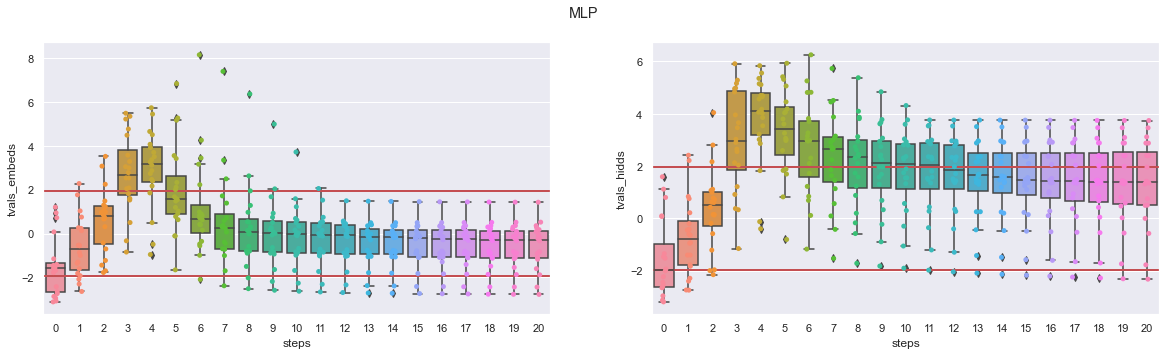

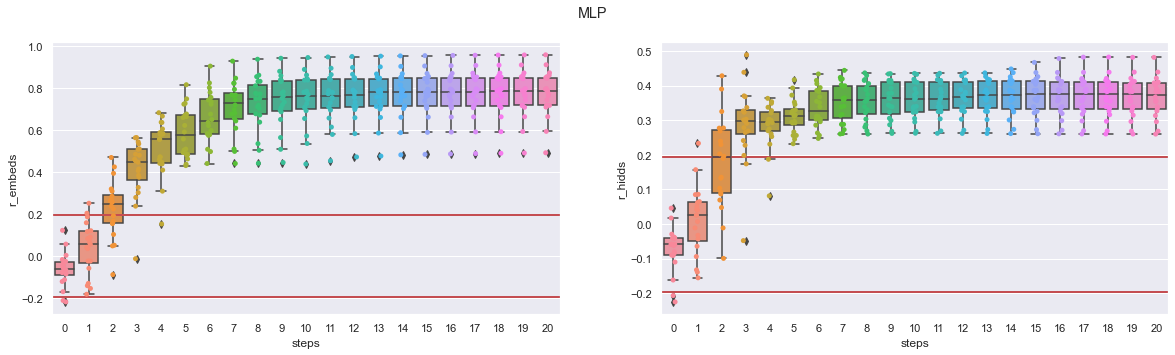

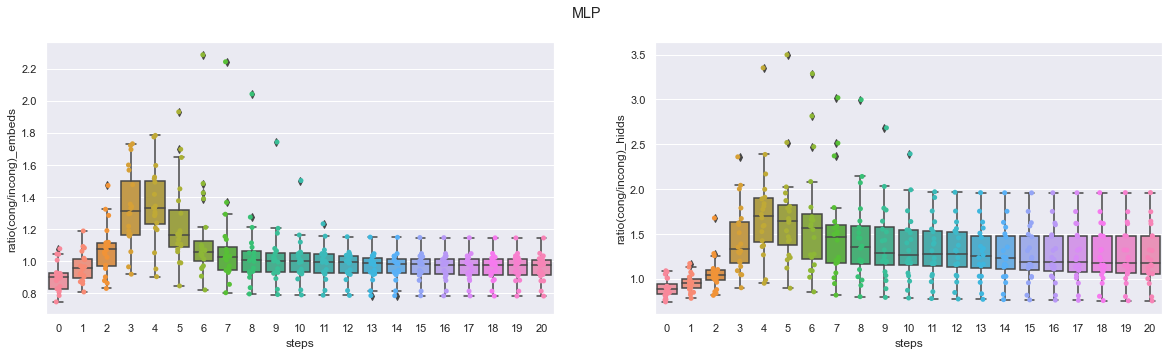

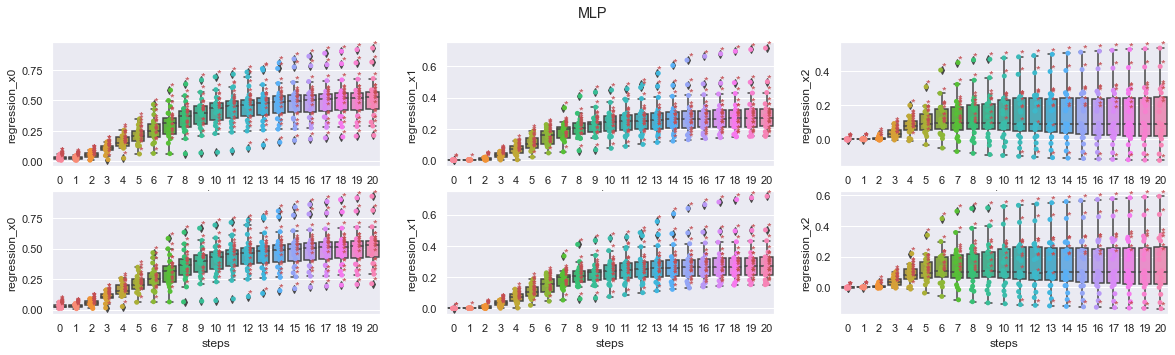

In [233]:
run_results(cortical_results, fig_strs, title)

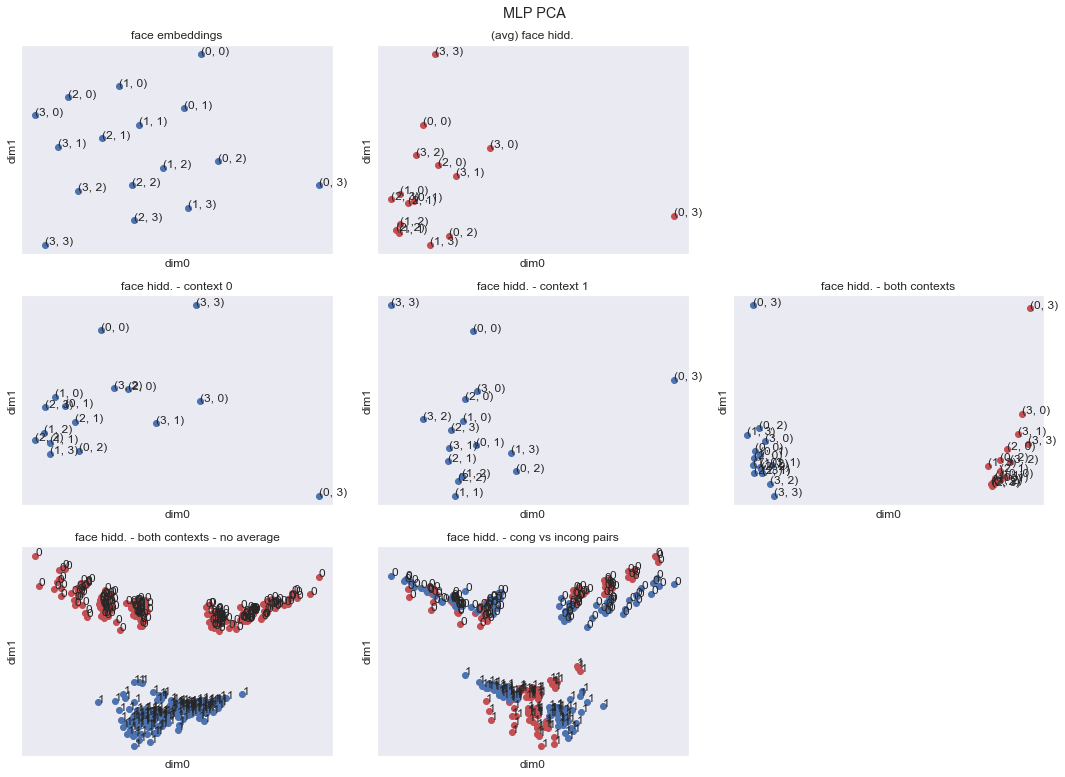

In [234]:
dims = [0,1]
plot_dim_red_results(cortical_results, 'pca', dims, res_str+'_pca_dim01', title+' PCA')

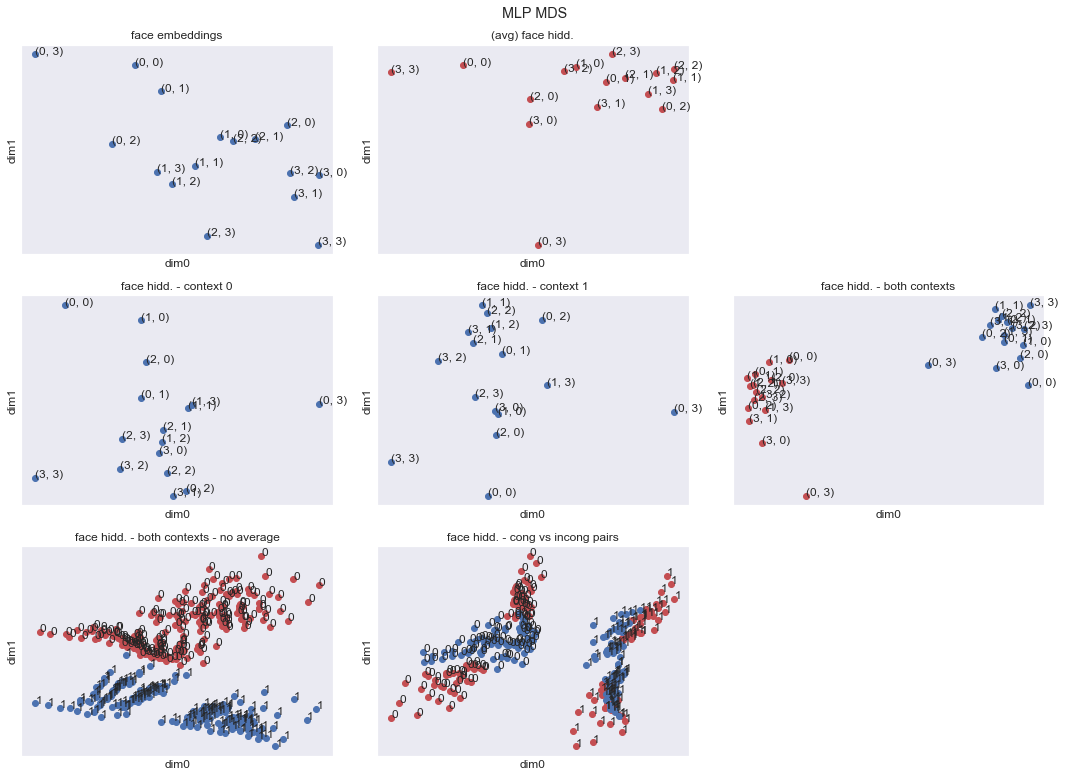

In [235]:
dims = [0,1]
plot_dim_red_results(cortical_results, 'mds', dims, res_str+'_mds_dim01', title+' MDS')

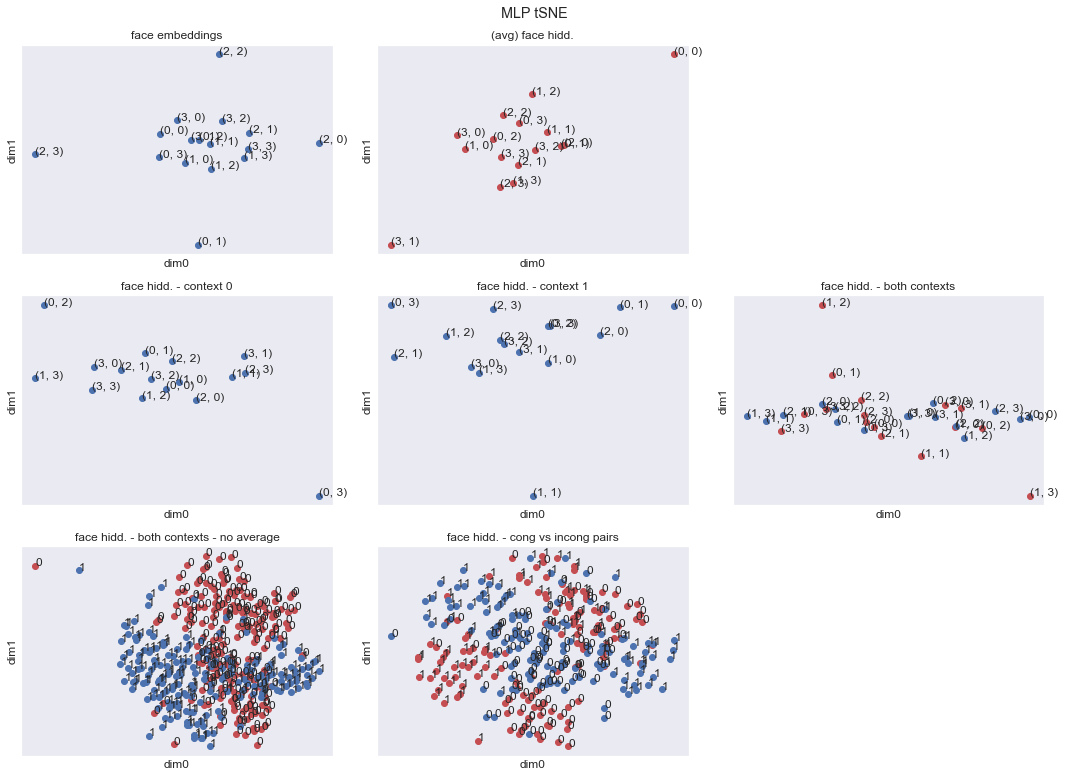

In [236]:
dims = [0,1]
plot_dim_red_results(cortical_results, 'tsne', dims, res_str+'_tsne_dim01', title+' tSNE')

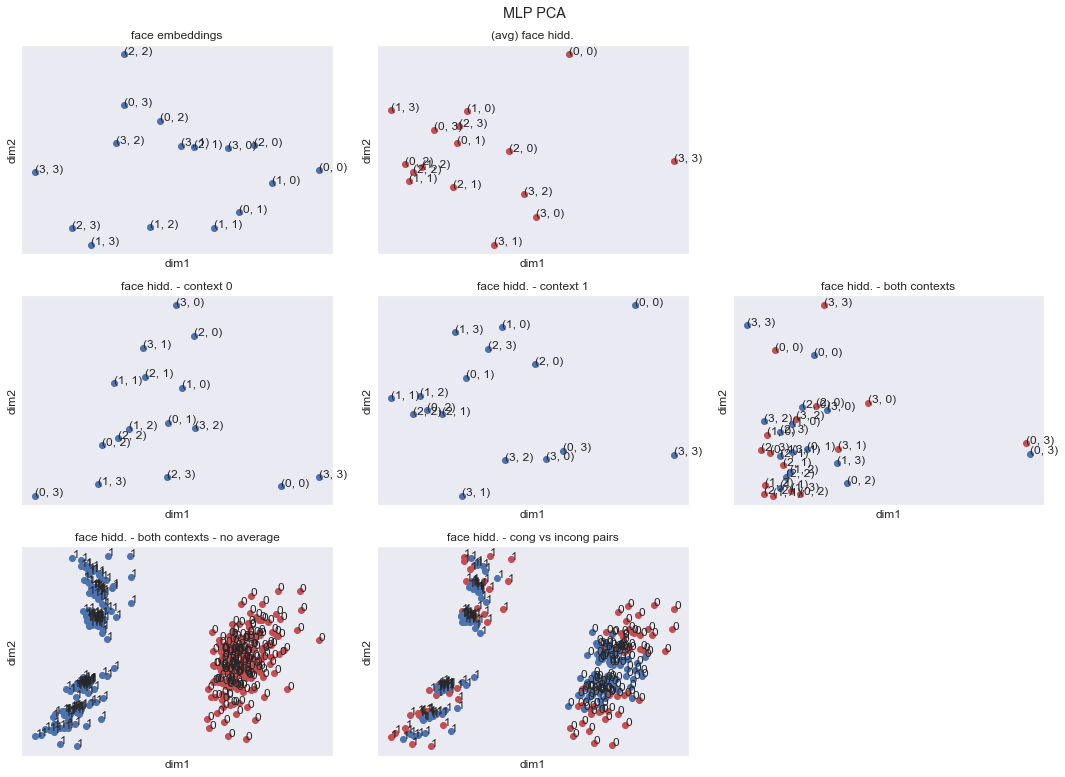

In [237]:
dims = [1,2]
plot_dim_red_results(cortical_results, 'pca', dims, res_str+'_pca_dim12', title+' PCA')

In [ ]:
# cortical_results=[]
# with open('results/results_mlp_bR.P', 'rb') as f:
#     results = pickle.load(f)
# cortical_results = results['Cortical']['analysis']  

# res_str = 'results_mlp_bR'
# fig_strs = [res_str+'_ttest', res_str+'_corr', 
#             res_str+'_ratio', res_str+'_regression']
# title = 'MLP - continuous regression - hidd. reps. before ReLU'
# run_results(cortical_results, fig_strs, title)
# plot_pca_results(cortical_results, res_str+'_pca', title)
    

## RNN

### categorical: using sign(phi) in the regression model
 - phi: 
    - the closer to 1, the closer to major diagonal
    - the closer to -1, the closer to minor diagonal
### continuous: using phi in the regression model

In [240]:
cortical_results=[]
with open('results/results_rnn.P', 'rb') as f:
    results = pickle.load(f)
cortical_results = results['Cortical']['analysis']

In [241]:
res_str = 'results_rnn'
fig_strs = [res_str+'_ttest', res_str+'_corr', 
            res_str+'_ratio', res_str+'_regression']
title = 'RNN'
    

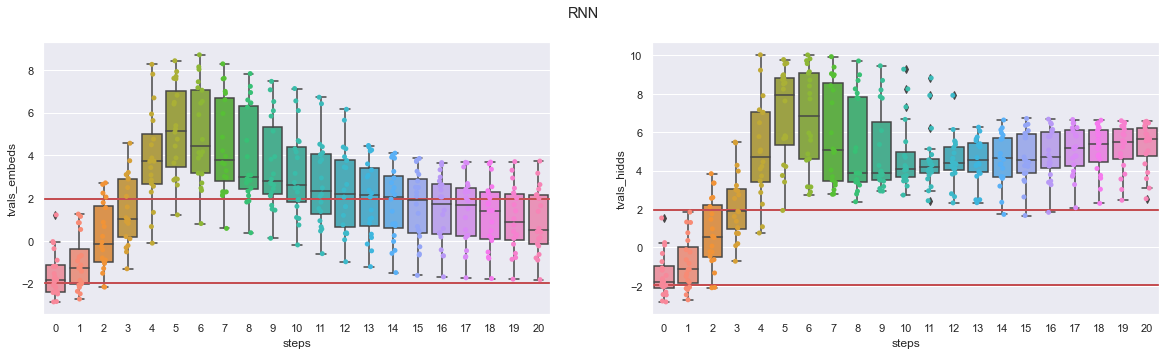

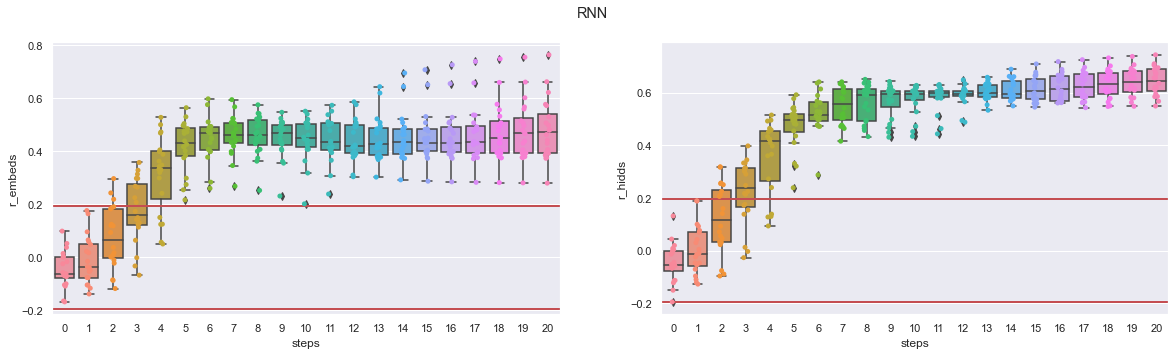

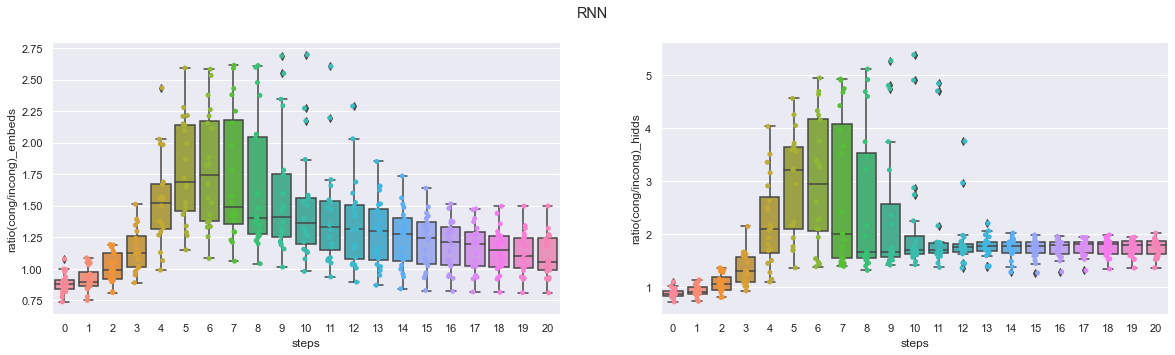

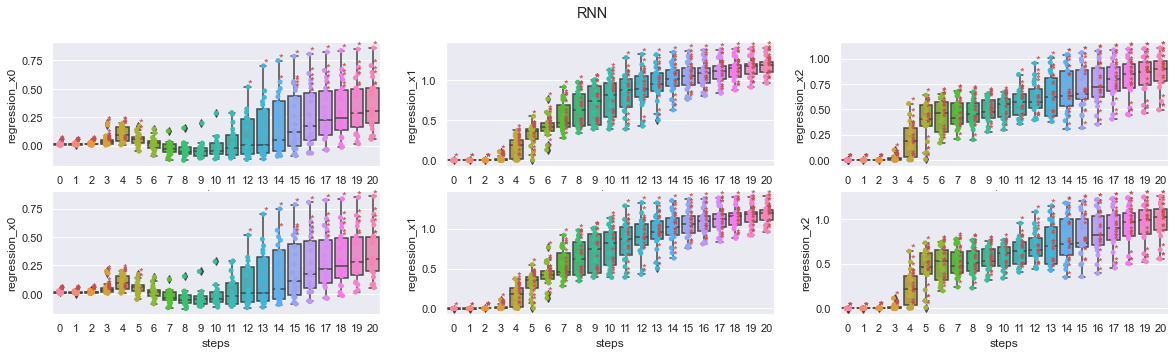

In [242]:
run_results(cortical_results, fig_strs, title)

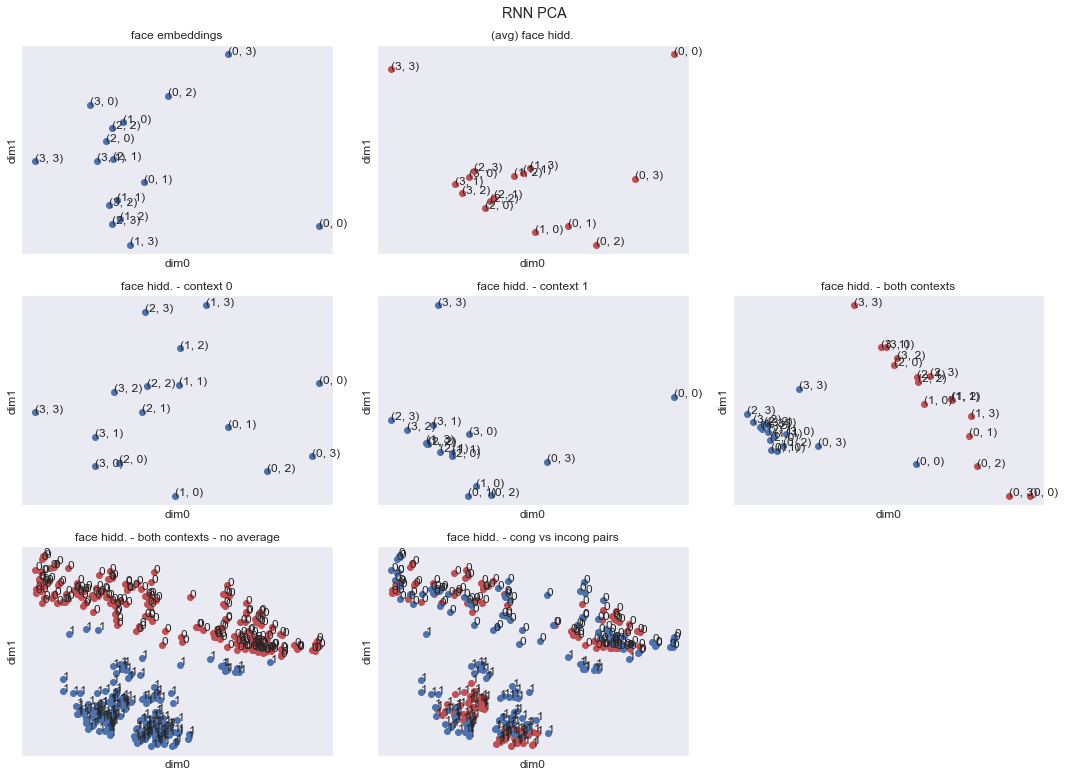

In [243]:
dims = [0,1]
plot_dim_red_results(cortical_results, 'pca', dims, res_str+'_pca_dim01', title+' PCA')

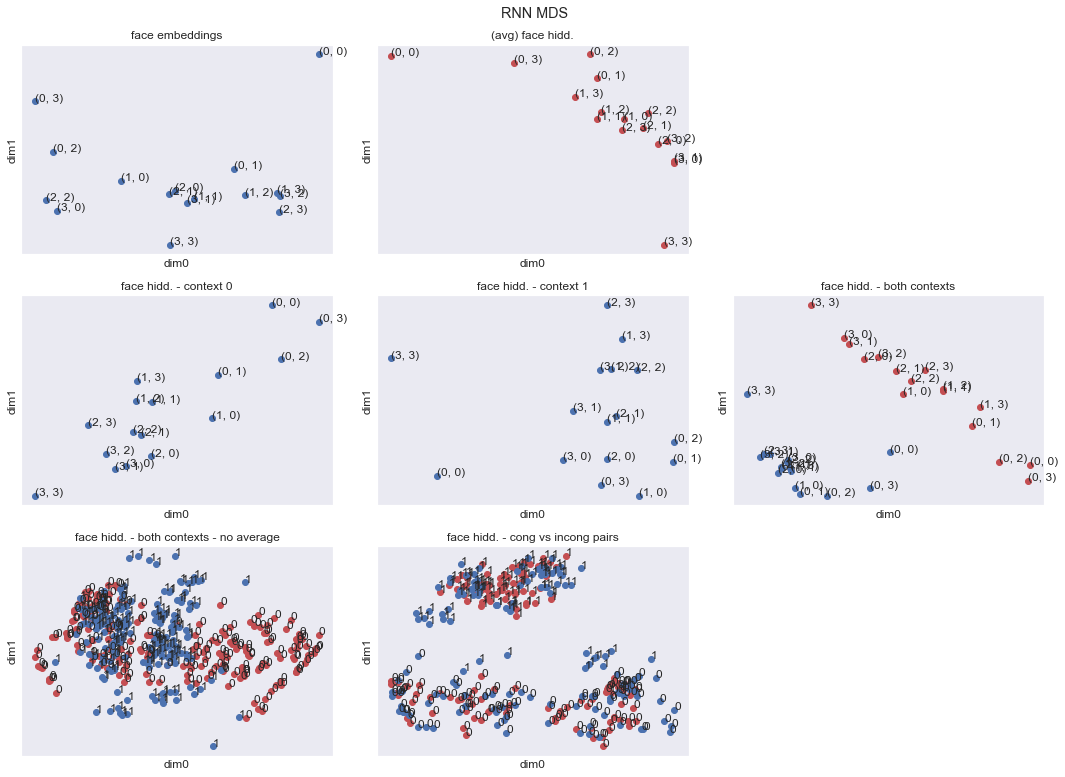

In [244]:
dims = [0,1]
plot_dim_red_results(cortical_results, 'mds', dims, res_str+'_mds_dim01', title+' MDS')

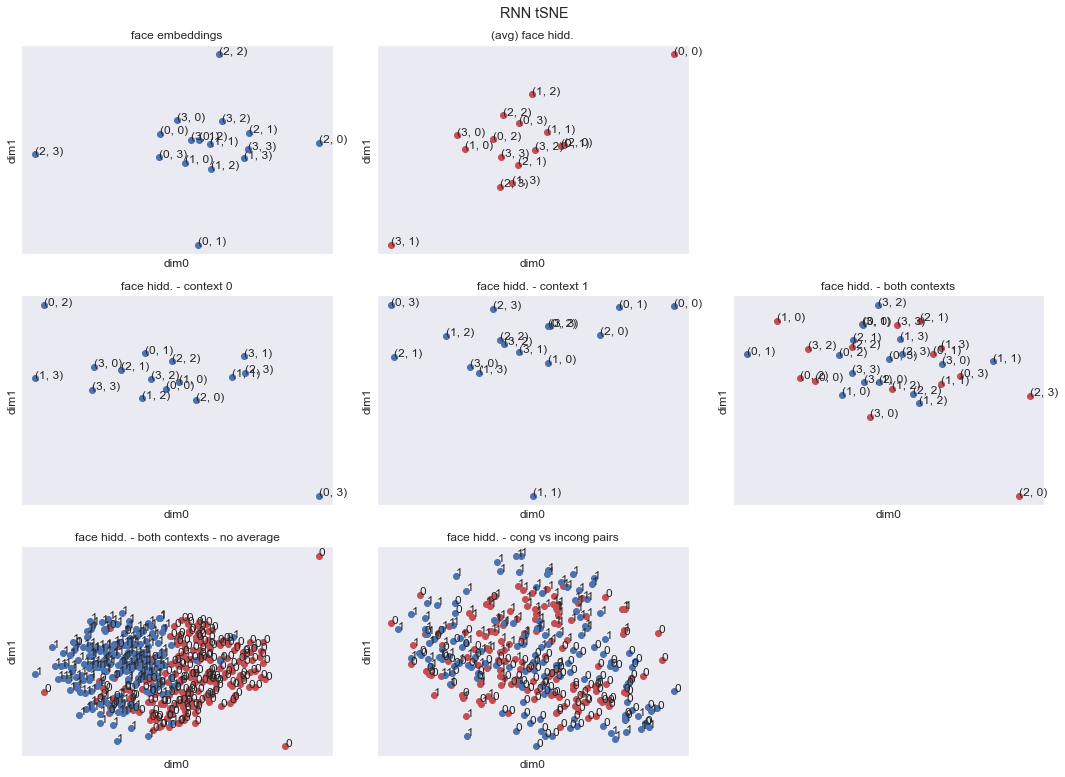

In [245]:
dims = [0,1]
plot_dim_red_results(cortical_results, 'tsne', dims, res_str+'_tsne_dim01', title+' tSNE')

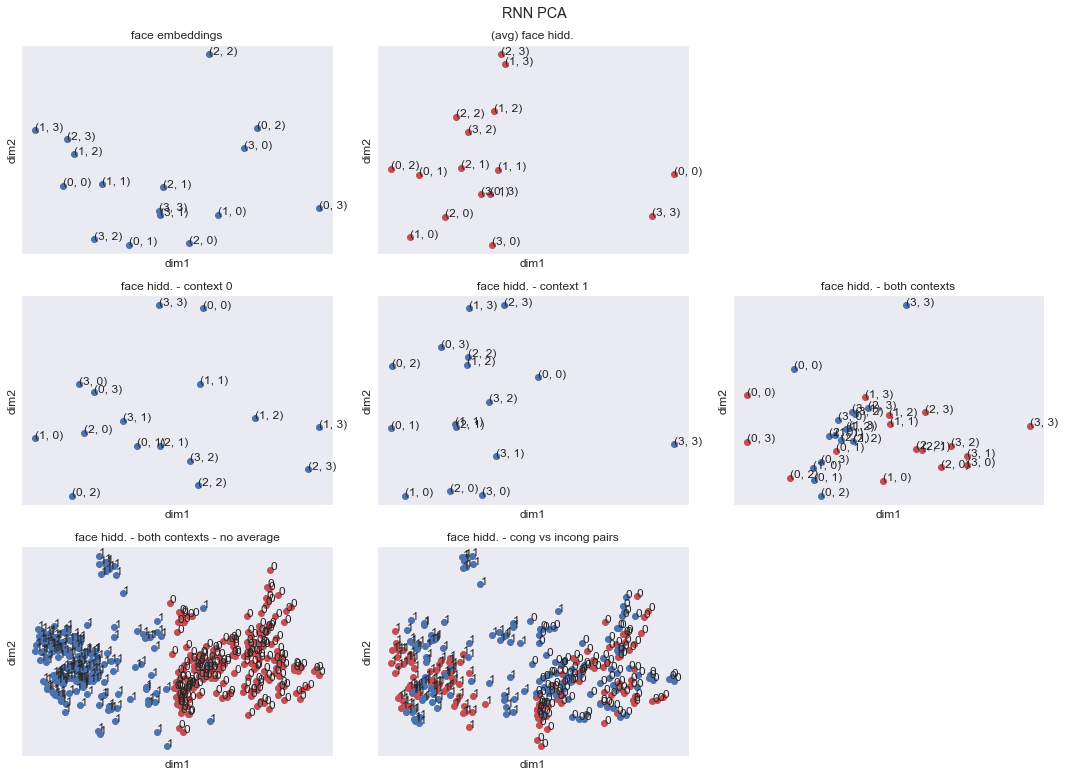

In [246]:
dims = [1,2]
plot_dim_red_results(cortical_results, 'pca', dims, res_str+'_pca_dim12', title+' PCA')

In [ ]:
with open('results/results_rnn.P', 'rb') as f:
    results = pickle.load(f)
cortical_results_rnn = results['Cortical']['analysis']

with open('results/results_mlp.P', 'rb') as f:
    results = pickle.load(f)
cortical_results_mlp = results['Cortical']['analysis']

In [ ]:
def plot_hist():
    